## Import Packages

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Import Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
data = pd.read_csv('/content/drive/My Drive/242Project/Data/USOpen_matches_with_feature.csv')

In [0]:
data.head()

## Read Data

In [0]:
data.player_0_rank = data.player_0_rank.astype(int)
data.player_1_rank = data.player_1_rank.astype(int)

In [0]:
label_encoder = LabelEncoder()
list0 = np.unique(np.concatenate((data['player_0'].unique(),data['player_1'].unique())))
label_encoder.fit(list0) 
data['player_0']=label_encoder.transform(data['player_0']) 
data['player_1']=label_encoder.transform(data['player_1'])

In [0]:
data.head()

In [0]:
data.info()

In [0]:
data.columns

## Selecting the columns

In [0]:
selected_columns = [ 'diff_match_win_percent',
       'diff_games_win_percent', 'diff_5_set_match_win_percent',
       'diff_close_sets_percent', 'diff_match_win_percent_hard',
       'diff_games_win_percent_hard', 'diff_5_set_match_win_percent_hard',
       'diff_close_sets_percent_hard', 'diff_match_win_percent_52',
       'diff_games_win_percent_52', 'diff_5_set_match_win_percent_52',
       'diff_close_sets_percent_52', 'diff_match_win_percent_hard_60',
       'diff_games_win_percent_hard_60',
       'diff_5_set_match_win_percent_hard_60',
       'diff_close_sets_percent_hard_60', 'diff_match_win_percent_hh',
       'diff_games_win_percent_hh', 'diff_match_win_percent_hard_hh',
       'diff_games_win_percent_hard_hh']
print(len(selected_columns))

## Split Data

In [0]:
# test_size: what proportion of original data is used for test set
train_set, test_set, train_target, test_target = train_test_split(data[selected_columns], data.outcome, test_size=0.2, random_state=0)

## Standardize Data

In [0]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_set)
# Apply transform to both the training set and the test set.
train_set = scaler.transform(train_set)
test_set = scaler.transform(test_set)

## Apply PCA

In [0]:
# Make an instance of the Model
pca = PCA()
pca.fit(train_set)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.explained_variance_ratio_

array([4.80495386e-01, 1.76813743e-01, 8.95178438e-02, 5.15424916e-02,
       4.58591188e-02, 3.47494875e-02, 2.13593704e-02, 2.01510621e-02,
       1.88282620e-02, 1.78855966e-02, 1.22948018e-02, 8.83315753e-03,
       6.61041957e-03, 4.72132282e-03, 4.31717301e-03, 3.22646389e-03,
       1.93316792e-03, 8.61132167e-04, 2.30197534e-32, 6.28816479e-34])

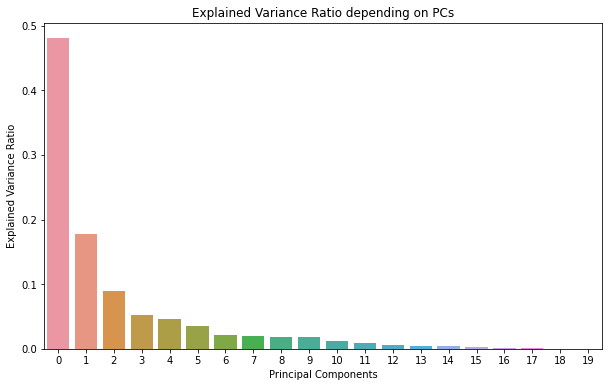

In [0]:
plt.figure(figsize=(10,6))
sns.barplot([i for i in range(20)],pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio depending on PCs')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

In [0]:
pca = PCA(3)
pca.fit(train_set)
train_set = pca.transform(train_set)
test_set = pca.transform(test_set)

In [0]:
print('Number of selected components:', pca.n_components_)
print(pca.explained_variance_ratio_)
print('Explained variance ratio:',pca.explained_variance_ratio_)

Number of selected components: 3
[0.48049539 0.17681374 0.08951784]
Explained variance ratio: [0.48049539 0.17681374 0.08951784]


## Apply Logistic Regression to the transformed data

In [0]:
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(train_set, train_target)
predictions = logisticRegr.predict(test_set)
test_target = np.array(test_target)
(predictions==test_target).sum()/len(predictions)

0.7890295358649789

# Tournament Test

## Import Data

In [0]:
tournament_test = pd.read_csv('/content/drive/My Drive/242Project/Data/tournament_test.csv')

In [0]:
tournament_test.head()

,Tournament,Date,Surface,Round,player_0,player_0_rank,player_0_odd,player_1,player_1_rank,player_1_odd,outcome,player_0_match_win_percent,player_1_match_win_percent,player_0_games_win_percent,player_1_games_win_percent,player_0_5_set_match_win_percent,player_1_5_set_match_win_percent,player_0_close_sets_percent,player_1_close_sets_percent,player_0_match_win_percent_hard,player_1_match_win_percent_hard,player_0_games_win_percent_hard,player_1_games_win_percent_hard,player_0_5_set_match_win_percent_hard,player_1_5_set_match_win_percent_hard,player_0_close_sets_percent_hard,player_1_close_sets_percent_hard,player_0_match_win_percent_52,player_1_match_win_percent_52,player_0_games_win_percent_52,player_1_games_win_percent_52,player_0_5_set_match_win_percent_52,player_1_5_set_match_win_percent_52,player_0_close_sets_percent_52,player_1_close_sets_percent_52,player_0_match_win_percent_hard_60,player_1_match_win_percent_hard_60,player_0_games_win_percent_hard_60,player_1_games_win_percent_hard_60,player_0_5_set_match_win_percent_hard_60,player_1_5_set_match_win_percent_hard_60,player_0_close_sets_percent_hard_60,player_1_close_sets_percent_hard_60,player_0_match_win_percent_hh,player_1_match_win_percent_hh,player_0_games_win_percent_hh,player_1_games_win_percent_hh,player_0_match_win_percent_hard_hh,player_1_match_win_percent_hard_hh,player_0_games_win_percent_hard_hh,player_1_games_win_percent_hard_hh,diff_rank,diff_match_win_percent,diff_games_win_percent,diff_5_set_match_win_percent,diff_close_sets_percent,diff_match_win_percent_hard,diff_games_win_percent_hard,diff_5_set_match_win_percent_hard,diff_close_sets_percent_hard,diff_match_win_percent_52,diff_games_win_percent_52,diff_5_set_match_win_percent_52,diff_close_sets_percent_52,diff_match_win_percent_hard_60,diff_games_win_percent_hard_60,diff_5_set_match_win_percent_hard_60,diff_close_sets_percent_hard_60,diff_match_win_percent_hh,diff_games_win_percent_hh,diff_match_win_percent_hard_hh,diff_games_win_percent_hard_hh
0,US Open,2020,Hard,4th Round,Djokovic N.,1,NaN,Shapovalov D.,16,NaN,NaN,0.836269,0.516949,0.593497,0.503990,0.875817,0.526316,0.618762,0.517857,0.845395,0.569767,0.598515,0.516674,0.880795,0.666667,0.627469,0.539007,0.861538,0.509434,0.607377,0.505335,0.961538,0.571429,0.619433,0.485549,0.862745,0.596154,0.602987,0.523019,1.000000,0.714286,0.617486,0.529412,1.0,0.0,0.720000,0.000000,1.0,0.0,0.720000,0.000000,-15,0.319320,0.089507,0.349501,0.100905,0.275627,0.081840,0.191542,0.088462,0.352104,0.102041,0.390110,0.133884,0.266591,0.079969,0.285714,0.088075,1.0,0.720000,1.0,0.720000
1,US Open,2020,Hard,4th Round,Nadal R.,2,NaN,Khachanov K.,15,NaN,NaN,0.848780,0.560000,0.601936,0.516809,0.891156,0.642857,0.618892,0.545455,0.792233,0.531250,0.577363,0.517157,0.858209,0.538462,0.601213,0.535032,0.882353,0.614035,0.644975,0.536184,0.916667,0.714286,0.597015,0.567839,0.933333,0.641509,0.611602,0.543284,0.933333,0.625000,0.633333,0.582857,0.0,1.0,0.000000,0.632653,0.0,1.0,0.000000,0.632653,-13,0.288780,0.085127,0.248299,0.073437,0.260983,0.060206,0.203474,0.066182,0.268318,0.108791,0.202381,0.029176,0.291824,0.068318,0.308333,0.050476,-1.0,-0.632653,-1.0,-0.632653
2,US Open,2020,Hard,4th Round,Thiem D.,3,NaN,Rublev A.,14,NaN,NaN,0.633758,0.488189,0.528693,0.494747,0.730159,0.550000,0.556180,0.482185,0.556291,0.477778,0.514842,0.492027,0.741935,0.600000,0.545631,0.450000,0.688525,0.560976,0.544109,0.511811,0.866667,0.600000,0.600939,0.496241,0.611111,0.512821,0.534156,0.506997,0.833333,0.500000,0.606061,0.480000,0.3,0.5,0.400000,0.475000,0.3,0.5,0.400000,0.475000,-11,0.145569,0.033946,0.180159,0.073995,0.078514,0.022814,0.284393,0.095631,0.127549,0.032298,0.266667,0.104698,0.098291,0.027159,0.333333,0.126061,-0.2,-0.075000,-0.2,-0.075000
3,US Open,2020,Hard,4th Round,Federer R.,4,NaN,Schwartzman D.,13,NaN,NaN,0.855967,0.537190,0.591208,0.516533,0.877676,0.583333,0.637815,0.491484,0.860353,0.563636,0.593505,0.524062,0.884393,0.640000,0.643341,0.507895,0.792453,0.620690,0.56

## Standardize

In [0]:
tournament_test_selected_columns = tournament_test[selected_columns]

In [0]:
tournament_test_selected_columns = scaler.transform(tournament_test_selected_columns)

In [0]:
tournament_test_selected_columns = pca.transform(tournament_test_selected_columns)

## Apply Logistic Regression to data test

In [0]:
predictions_test = logisticRegr.predict(tournament_test_selected_columns)
predictions_test_probas = logisticRegr.predict_proba(tournament_test_selected_columns)

In [0]:
predictions_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [0]:
proba_0_wins = [predictions_test_probas[i,0] for i in range(np.shape(predictions_test_probas)[0])]
proba_1_wins = [predictions_test_probas[i,1] for i in range(np.shape(predictions_test_probas)[0])]

In [0]:
len(proba_1_wins)

120

In [0]:
tournament_test['outcome']=predictions_test
tournament_test['proba_0_wins'] = proba_0_wins
tournament_test['proba_1_wins'] = proba_1_wins

In [0]:
tournament_test.head()

,Tournament,Date,Surface,Round,player_0,player_0_rank,player_0_odd,player_1,player_1_rank,player_1_odd,outcome,player_0_match_win_percent,player_1_match_win_percent,player_0_games_win_percent,player_1_games_win_percent,player_0_5_set_match_win_percent,player_1_5_set_match_win_percent,player_0_close_sets_percent,player_1_close_sets_percent,player_0_match_win_percent_hard,player_1_match_win_percent_hard,player_0_games_win_percent_hard,player_1_games_win_percent_hard,player_0_5_set_match_win_percent_hard,player_1_5_set_match_win_percent_hard,player_0_close_sets_percent_hard,player_1_close_sets_percent_hard,player_0_match_win_percent_52,player_1_match_win_percent_52,player_0_games_win_percent_52,player_1_games_win_percent_52,player_0_5_set_match_win_percent_52,player_1_5_set_match_win_percent_52,player_0_close_sets_percent_52,player_1_close_sets_percent_52,player_0_match_win_percent_hard_60,player_1_match_win_percent_hard_60,player_0_games_win_percent_hard_60,player_1_games_win_percent_hard_60,player_0_5_set_match_win_percent_hard_60,player_1_5_set_match_win_percent_hard_60,player_0_close_sets_percent_hard_60,player_1_close_sets_percent_hard_60,player_0_match_win_percent_hh,player_1_match_win_percent_hh,player_0_games_win_percent_hh,player_1_games_win_percent_hh,player_0_match_win_percent_hard_hh,player_1_match_win_percent_hard_hh,player_0_games_win_percent_hard_hh,player_1_games_win_percent_hard_hh,diff_rank,diff_match_win_percent,diff_games_win_percent,diff_5_set_match_win_percent,diff_close_sets_percent,diff_match_win_percent_hard,diff_games_win_percent_hard,diff_5_set_match_win_percent_hard,diff_close_sets_percent_hard,diff_match_win_percent_52,diff_games_win_percent_52,diff_5_set_match_win_percent_52,diff_close_sets_percent_52,diff_match_win_percent_hard_60,diff_games_win_percent_hard_60,diff_5_set_match_win_percent_hard_60,diff_close_sets_percent_hard_60,diff_match_win_percent_hh,diff_games_win_percent_hh,diff_match_win_percent_hard_hh,diff_games_win_percent_hard_hh,outcome_0_proba,outcome_1_proba,proba_0_wins,proba_1_wins
0,US Open,2020,Hard,4th Round,Djokovic N.,1,NaN,Shapovalov D.,16,NaN,0,0.836269,0.516949,0.593497,0.503990,0.875817,0.526316,0.618762,0.517857,0.845395,0.569767,0.598515,0.516674,0.880795,0.666667,0.627469,0.539007,0.861538,0.509434,0.607377,0.505335,0.961538,0.571429,0.619433,0.485549,0.862745,0.596154,0.602987,0.523019,1.000000,0.714286,0.617486,0.529412,1.0,0.0,0.720000,0.000000,1.0,0.0,0.720000,0.000000,-15,0.319320,0.089507,0.349501,0.100905,0.275627,0.081840,0.191542,0.088462,0.352104,0.102041,0.390110,0.133884,0.266591,0.079969,0.285714,0.088075,1.0,0.720000,1.0,0.720000,0.833266,0.166734,0.833266,0.166734
1,US Open,2020,Hard,4th Round,Nadal R.,2,NaN,Khachanov K.,15,NaN,0,0.848780,0.560000,0.601936,0.516809,0.891156,0.642857,0.618892,0.545455,0.792233,0.531250,0.577363,0.517157,0.858209,0.538462,0.601213,0.535032,0.882353,0.614035,0.644975,0.536184,0.916667,0.714286,0.597015,0.567839,0.933333,0.641509,0.611602,0.543284,0.933333,0.625000,0.633333,0.582857,0.0,1.0,0.000000,0.632653,0.0,1.0,0.000000,0.632653,-13,0.288780,0.085127,0.248299,0.073437,0.260983,0.060206,0.203474,0.066182,0.268318,0.108791,0.202381,0.029176,0.291824,0.068318,0.308333,0.050476,-1.0,-0.632653,-1.0,-0.632653,0.779126,0.220874,0.779126,0.220874
2,US Open,2020,Hard,4th Round,Thiem D.,3,NaN,Rublev A.,14,NaN,0,0.633758,0.488189,0.528693,0.494747,0.730159,0.550000,0.556180,0.482185,0.556291,0.477778,0.514842,0.492027,0.741935,0.600000,0.545631,0.450000,0.688525,0.560976,0.544109,0.511811,0.866667,0.600000,0.600939,0.496241,0.611111,0.512821,0.534156,0.506997,0.833333,0.500000,0.606061,0.480000,0.3,0.5,0.400000,0.475000,0.3,0.5,0.400000,0.475000,-11,0.145569,0.033946,0.180159,0.073995,0.078514,0.022814,0.284393,0.095631,0.127549,0.032298,0.266667,0.104698,0.098291,0.027159,0.333333,0.126061,-0.2,-0.075000,-0.2,-0.075000,0.734883,0.265117,0.734883,0.265117
3,US Open,2020,Hard,4th Round,Federer R.,4,NaN,Schwartzman D.,13,NaN,0,0.855967

## Better Visualization of the outcome

In [0]:
columns = ['Round', 'player_0', 'player_1', 'proba_0_wins', 'proba_1_wins', 'outcome', 'player_0_rank', 'player_1_rank']

In [0]:
good_results = tournament_test[columns]

In [0]:
good_results

,Round,player_0,player_1,proba_0_wins,proba_1_wins,outcome,player_0_rank,player_1_rank
0,4th Round,Djokovic N.,Shapovalov D.,0.833266,0.166734,0,1,16
1,4th Round,Nadal R.,Khachanov K.,0.779126,0.220874,0,2,15
2,4th Round,Thiem D.,Rublev A.,0.734883,0.265117,0,3,14
3,4th Round,Federer R.,Schwartzman D.,0.763016,0.236984,0,4,13
4,4th Round,Medvedev D.,Bautista Agut R.,0.512877,0.487123,0,5,12
...,...,...,...,...,...,...,...,...
115,Final,Goffin D.,Bautista Agut R.,0.510749,0.489251,0,10,12
116,Final,Thiem D.,Bautista Agut R.,0.552175,0.447825,0,3,12
117,Final,Bautista Agut R.,Rublev A.,0.731081,0.268919,0,12,14
118,Final,Tsitsipas S.,Bautista Agut R.,0.489934,0.510066,1,6,12


In [0]:
good_results[good_results['outcome']==1]

,Round,player_0,player_1,proba_0_wins,proba_1_wins,outcome,player_0_rank,player_1_rank
7,4th Round,Berrettini M.,Monfils G.,0.491612,0.508388,1,8,9
35,Semifinals,Berrettini M.,Bautista Agut R.,0.496152,0.503848,1,8,12
45,Semifinals,Rublev A.,Khachanov K.,0.467931,0.532069,1,14,15
47,Semifinals,Fognini F.,Khachanov K.,0.479641,0.520359,1,11,15
92,Final,Thiem D.,Federer R.,0.409115,0.590885,1,3,4
118,Final,Tsitsipas S.,Bautista Agut R.,0.489934,0.510066,1,6,12
119,Final,Fognini F.,Bautista Agut R.,0.343087,0.656913,1,11,12


In [0]:
good_results.to_csv(r'/content/drive/My Drive/242Project/Data/Tournament_Results.csv', index = False)